In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score,calinski_harabasz_score
import warnings 
warnings.filterwarnings("ignore")

In [35]:
airlines_data=pd.read_excel('EastWestAirlines.xlsx',1)
airlines_data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [38]:
airlines_data.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [39]:
airlines_data.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [40]:
airlines_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


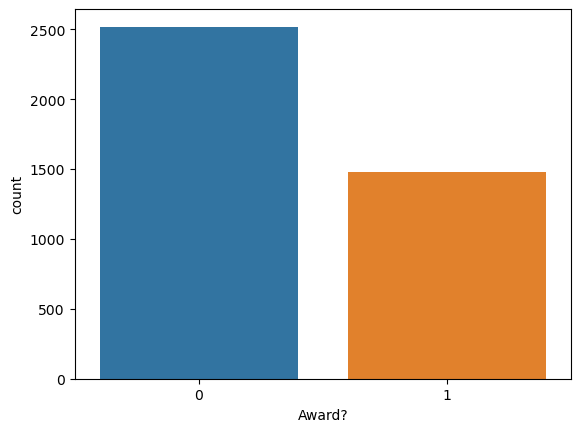

In [41]:
sns.countplot(airlines_data['Award?'])
plt.show()

<AxesSubplot:>

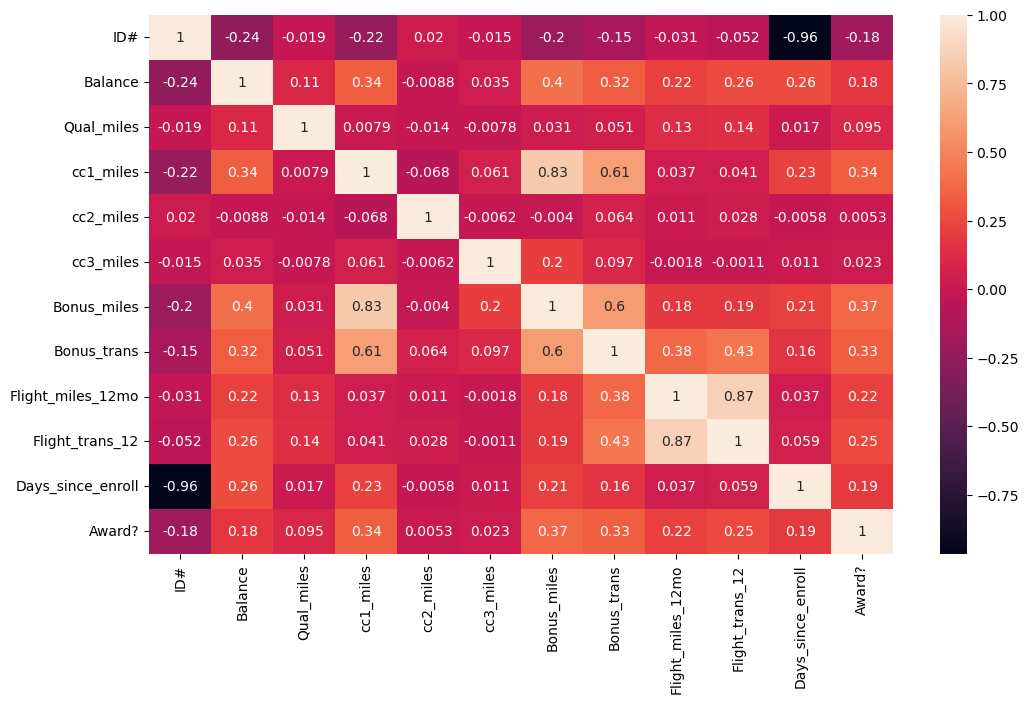

In [42]:
corr=airlines_data.corr()
plt.figure(figsize=(12,7))
sns.heatmap(corr,annot=True)

In [43]:
#normalization function
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return (x)

In [45]:
airlines_norm =norm_func(airlines_data.iloc[:,1:])                 
airlines_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


### Hierarchical

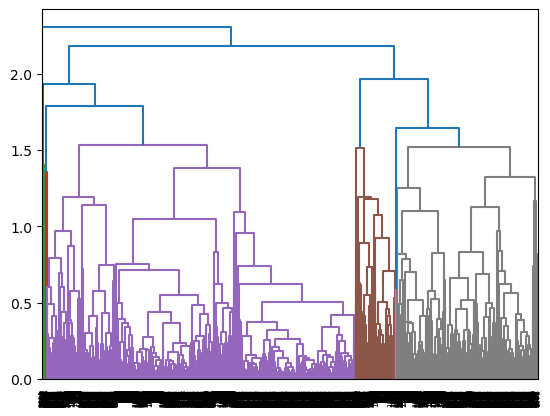

In [28]:
#creating dendrogram

dendrogram=sch.dendrogram(sch.linkage(airlines_norm,method='complete'))

In [46]:
#creating cluster
hc=AgglomerativeClustering(n_clusters=4,affinity='euclidean')
hc

AgglomerativeClustering(n_clusters=4)

In [47]:
#save clusters for chart
y_hc=hc.fit_predict(airlines_norm)
y_hc

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [48]:
clusters=pd.DataFrame(y_hc,columns=['clusters'])
clusters

,clusters
0,0
1,0
2,0
3,0
4,3
...,...
3994,1
3995,1
3996,1
3997,0


In [49]:
airlines_data['clusters']=clusters
airlines_data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [50]:
airlines_data[airlines_data['clusters']==0]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
5,6,16420,0,1,1,1,0,0,0,0,6942,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3990,4013,11310,0,1,1,1,5021,2,0,0,1409,0,0
3992,4015,11181,0,1,1,1,929,12,0,0,1407,0,0
3993,4016,3974,0,1,1,1,365,3,0,0,1397,0,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [51]:
airlines_data[airlines_data['clusters']==1]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
7,8,20856,0,1,1,1,5250,4,250,1,6938,1,1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,1
17,18,13958,0,1,1,1,4291,5,0,0,6905,1,1
18,19,91473,0,3,1,1,27408,17,0,0,6903,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3987,4010,11933,0,1,1,1,249,3,79,1,1412,1,1
3989,4012,2622,0,1,1,1,1625,6,0,0,1404,1,1
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1


In [52]:
airlines_data[airlines_data['clusters']==2]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
6,7,84914,0,3,1,1,27482,25,0,0,6994,0,2
10,11,40091,0,2,1,1,7278,10,0,0,6959,0,2
12,13,43382,0,2,1,1,11150,20,0,0,6924,0,2
30,31,177926,0,3,1,1,20797,13,0,0,7886,0,2
32,33,276571,0,4,1,1,42044,23,0,0,7872,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3972,3995,35185,0,2,1,1,5957,7,0,0,1439,0,2
3974,3997,58387,0,3,1,1,14581,39,0,0,1435,0,2
3980,4003,28867,0,3,1,1,19169,28,0,0,1425,0,2
3985,4008,59017,0,4,1,1,34746,25,0,0,1418,0,2


In [53]:
airlines_data[airlines_data['clusters']==3]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3
11,12,96522,0,5,1,1,61105,19,0,0,6924,1,3
15,16,28495,0,4,1,1,49442,15,0,0,6912,1,3
16,17,51890,0,4,1,1,48963,16,0,0,6910,1,3
20,21,120576,0,5,1,1,58831,23,250,2,6896,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3855,3878,190730,0,5,1,1,78916,28,2450,9,1648,1,3
3881,3904,32424,0,4,1,1,39635,16,0,0,1584,1,3
3883,3906,126167,0,5,1,1,190160,15,0,0,1612,1,3
3908,3931,57642,0,4,1,1,52176,15,0,0,1564,1,3


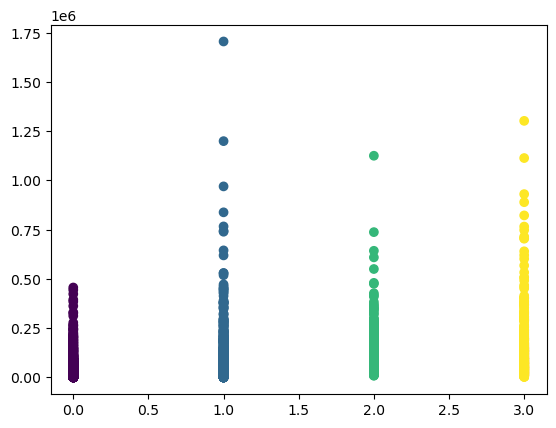

In [54]:
#plot the clusters
plt.scatter(airlines_data['clusters'],airlines_data['Balance'],c=hc.labels_)
plt.show()

### K Mean

In [115]:
airlines_data1=airlines_data.drop('clusters',axis=1)
airlines_data1

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


### Elbow Method

[1830.7932128584114,
 823.6756984125207,
 625.168488157072,
 436.70885761932624,
 348.94332172541374,
 315.15106431174485,
 287.73076207313125,
 263.21355868071754,
 243.93051296436542,
 226.11312094182145]

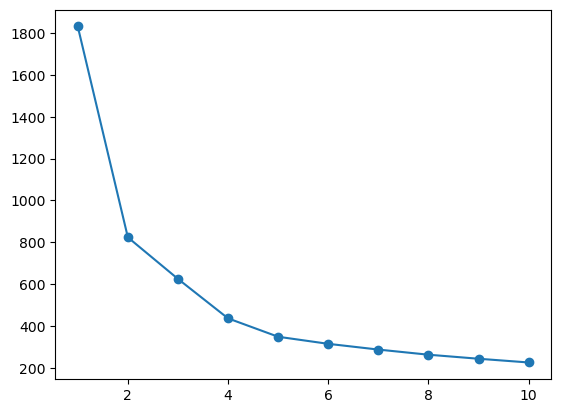

In [92]:
nc=range(1,11)
inertia=[]
for i in nc:
    cluster1=KMeans(n_clusters=i)
    label=cluster1.fit_predict(airlines_norm)
    inertia.append(cluster1.inertia_   )
plt.scatter(nc,inertia)
plt.plot(nc,inertia)
inertia

### Silhouettte Score

[0.535930510919477,
 0.4648452938858305,
 0.47483765255961,
 0.44306720727960347,
 0.4037918219414183,
 0.3909601011818369,
 0.38081405211869596,
 0.34154730117152554,
 0.3450858444314853]

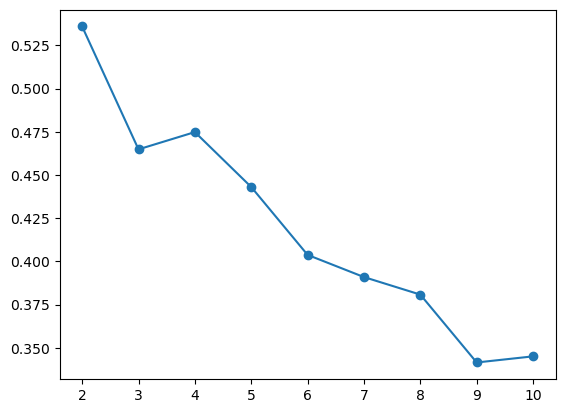

In [90]:
nc=range(2,11)
sil=[]
for i in nc:
    cluster2=KMeans(n_clusters=i)
    label=cluster2.fit_predict(airlines_norm)
    sil.append(silhouette_score(airlines_norm,label))
plt.scatter(nc,sil)
plt.plot(nc,sil)
sil

In [80]:
max(sil)

0.7417389971740307

In [82]:
#silhouette  score for kvalue of 2 is higher in the list

### calinski harabasz score

[4887.1767286548775,
 3853.1023965303593,
 4251.014455062032,
 4240.307878597629,
 3840.7086979388973,
 3565.9529689389924,
 3394.8066075854,
 3244.775200131809]

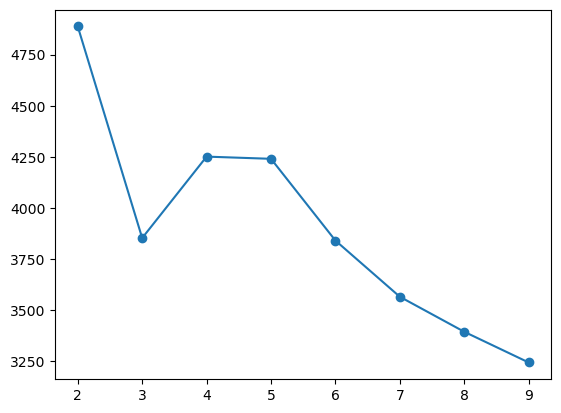

In [89]:
nc=range(2,10)
cal=[]
for i in nc:
    cluster3=KMeans(n_clusters=i)
    label=cluster3.fit_predict(airlines_norm)
    cal.append(calinski_harabasz_score(airlines_norm,label))
plt.scatter(nc,cal)
plt.plot(nc,cal)
cal



In [104]:
kmean_cluster=KMeans(n_clusters=2)
cluster=kmean_cluster.fit_predict(airlines_norm)
cluster

array([0, 0, 0, ..., 1, 0, 0])

In [116]:
airlines_data1['cluster']=cluster
airlines_data1

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


### DBSCAN

In [117]:
airlines_data1.drop('cluster',axis=1)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [123]:
label_db=DBSCAN(eps=0.2,min_samples=2)
cluster_db=label_db.fit_predict(airlines_norm)
cluster_db

array([0, 0, 0, ..., 4, 0, 0], dtype=int64)

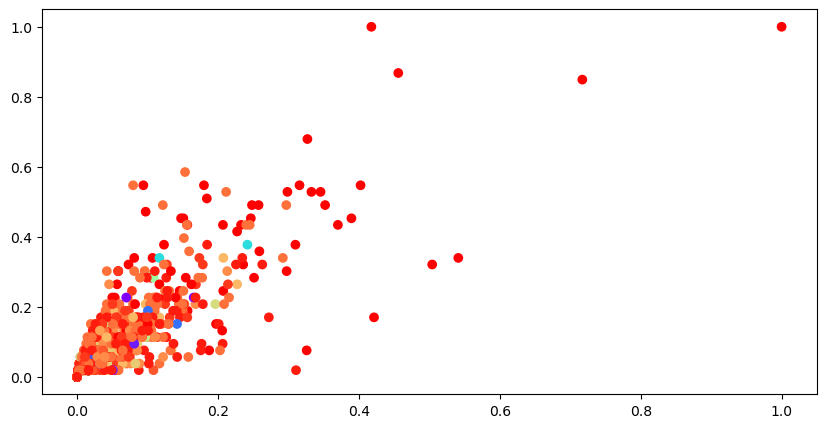

In [124]:
plt.figure(figsize=(10,5))
plt.scatter(airlines_norm['Flight_miles_12mo'],airlines_norm['Flight_trans_12'],c=cluster_db,cmap=plt.cm.rainbow_r)
